In [202]:
import pandas as pd
df = pd.read_csv("Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [203]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [204]:
df["Extracurricular Activities"] = le.fit_transform(df["Extracurricular Activities"])

In [205]:
means = df.drop(columns=['Performance Index']).mean().tolist()
means

[4.9929, 69.4457, 0.4948, 6.5306, 4.5833]

In [206]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [207]:
import numpy as np
val =df["Performance Index"].unique()
newval = np.sort(val)
print(newval)

[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.
  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.
  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.
  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.
  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.
  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.
  94.  95.  96.  97.  98.  99. 100.]


In [208]:
import matplotlib.pyplot as plt

In [312]:
# import matplotlib.pyplot as plt

# # Assuming X_train contains your features and y_train is the target
# for column in df.columns:
#     plt.figure(figsize=(6, 4))
#     plt.scatter(df[column], df["Performance Index"], alpha=0.5)
#     plt.xlabel(column)
#     plt.ylabel('Performance index')
#     plt.title(f'{column} vs Performance index')
#     plt.show()
#     df.plot()

In [210]:

X =df.iloc[:,0:5]
y =df.iloc[:,-1]
x_m=X.mean().sum()
y_m=y.mean()
b= y_m-x_m
print(b)


-30.82249999999999


In [211]:
import numpy as np
X =np.array(X)
X

array([[ 7, 99,  1,  9,  1],
       [ 4, 82,  0,  4,  2],
       [ 8, 51,  1,  7,  2],
       ...,
       [ 6, 83,  1,  8,  5],
       [ 9, 97,  1,  7,  0],
       [ 7, 74,  0,  8,  1]], dtype=int64)

In [212]:
print(X.shape)

(10000, 5)


In [213]:
y = np.array(y)
print(len(X[0]))

5


In [214]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=2)



In [219]:
def calculate_cost(ya,yp):
    
    b_error =[(ya[i]-yp[i]) for i in range(len(ya))]
    # print("b_error: ",b_error)
    b_sum =sum(b_error)
    cost = (1/(len(ya)))*b_sum

    return cost


100.0


In [349]:
w=np.ones(len(X[0]))
b =-30.82249999999999
print(b)
print(w)

def predict(Xt,w,b):
    preds =[[w*x for w,x in zip(w,row)]for row in Xt]
    prediction =[sum(x)+b for x in preds]
    
    # print(prediction)
    # print(len(prediction))#800
    return prediction


def improve(X_train,ya,w,b):
    lr=0.0001
    for i in range(1000):

        yp =predict(X_train,w,b)
        yn =sum(yp)/len(yp)
        cost = calculate_cost(ya=ya,yp=yp)
        n=len(yp)

        b +=lr*cost-((yn-X_train.mean())/(n))
        
        # b +=lr*cost*(sum(means)/5)
        w =[(w+lr*cost*2*mean) for w,mean in zip(w,means)]
        # w =[x+lr*cost for x in w]
        print("c :",cost) 
        print("w: ",w)
        
    return (cost,w,b)
    

def fit_model(X_train,y_train,w,b):
    
    prediction = predict(X_train,w,b)
    cost  = calculate_cost(y_train,prediction)
    # print(cost)
     
    m=[x.mean() for x in X_train]
    cost,w,b = improve(X_train,y_train,w,b)
    print("training",cost)
    prediction =predict(X_train,w,b)

    # cost  = calculate_cost(y_train,prediction)
    # # print(prediction)
    # # print(cost,w,b)
    return prediction,w,b,cost



# fit_model(X_train,y_train,w,b)
prediction,w,b,cost = fit_model(X_train,y_train,w,b)
print("printing w",w)

print("printing b",b)


# print("printing imp training cost",cost)
# print(y_train)

    


-30.82249999999999
[1. 1. 1. 1. 1.]
c : -0.000750000000009095
w:  [0.999999251065, 0.9999895831449999, 0.99999992578, 0.99999902041, 0.999999312505]
c : 0.0047265213933342575
w:  [1.000003970874733, 1.000055230462345, 1.0000003935165571, 1.0000051938141223, 1.0000036451181005]
c : 0.004831468751688158
w:  [1.0000087954827992, 1.0001223354082427, 1.0000008716387048, 1.0000115042920883, 1.0000080739322463]
c : 0.004833479872843421
w:  [1.0000136220991307, 1.0001894682868837, 1.000001349959873, 1.0000178173968197, 1.0000125045899066]
c : 0.004833518412244526
w:  [1.0000184487539467, 1.0002566017008039, 1.000001828284855, 1.0000241305518882, 1.0000169352828945]
c : 0.004833519150794007
w:  [1.0000232754095004, 1.0003237351249818, 1.0000023066099102, 1.0000304437079215, 1.0000213659765593]
c : 0.004833519164938016
w:  [1.000028102065068, 1.0003908685493563, 1.0000027849349666, 1.0000367568639732, 1.000025796670237]
c : 0.00483351916520662
w:  [1.000032928720636, 1.0004580019737346, 1.000003

initial cost:
54380440000.0


    


In [350]:
print(prediction[:20])
print(y_train[:20])

[77.05956029626697, 68.65342015954462, 35.69514305391673, 42.53707168614995, 82.4651691789552, 36.9560230623863, 24.326206727988485, 32.296618308403545, 51.12831619681993, 54.151576568618985, 21.321034001501566, 88.9923576040745, 52.769213091467954, 41.275400686577235, 70.21746064001513, 32.806333403265334, 62.36527857318193, 24.326997719091622, 73.54565068913493, 41.589821581241644]
[83. 71. 47. 40. 84. 34. 18. 29. 60. 63. 15. 91. 46. 39. 61. 36. 67. 23.
 77. 41.]


In [351]:
y = list(y_train)
y = y[:50]
p=prediction[:50]


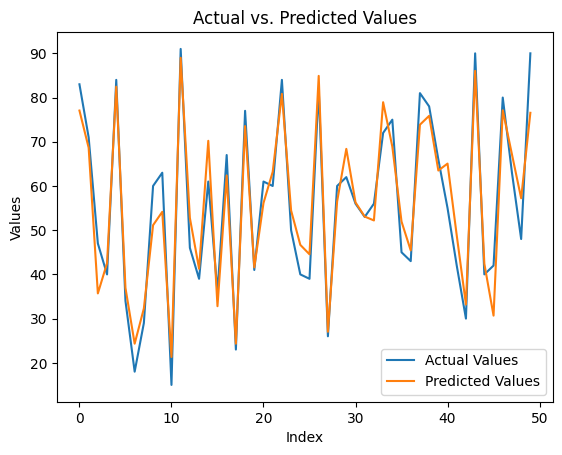

In [352]:
y = list(y_train)
y = y[:50]
p=prediction[:50]

import matplotlib.pyplot as plt

# Assuming prediction is the predicted values for y_train
plt.plot(y, label='Actual Values')  # Reset index to match the prediction if necessary
plt.plot(p, label='Predicted Values')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()  # Add legend to differentiate between the lines
plt.show()


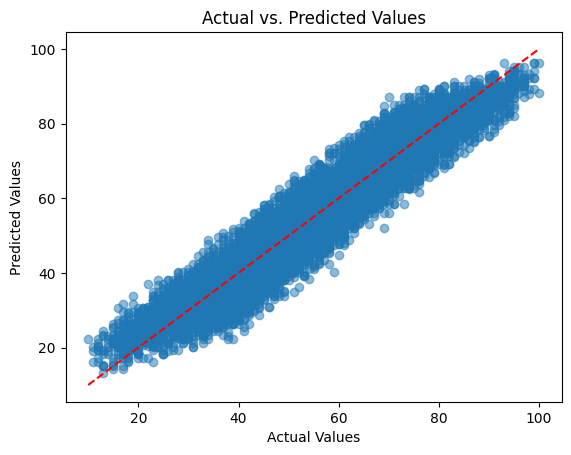

In [354]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(y_train, prediction, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--')  # 45-degree line
plt.show()


In [303]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_train)


In [304]:
print(model.coef_)
print(model.intercept_)


[2.85352109 1.01959723 0.59483017 0.48314352 0.1977199 ]
-34.177527651216565


In [298]:
print(y_pred[:20])
print(y_train[:20])

[80.66972865 68.73341646 43.22498865 40.69971087 86.76332905 37.22870755
 16.09138387 29.80358304 58.87445267 62.58257414 18.32776232 91.86886586
 45.14254185 41.38438959 63.73156021 38.96398122 66.17080475 21.40298625
 78.08935379 39.49963994]
[83. 71. 47. 40. 84. 34. 18. 29. 60. 63. 15. 91. 46. 39. 61. 36. 67. 23.
 77. 41.]


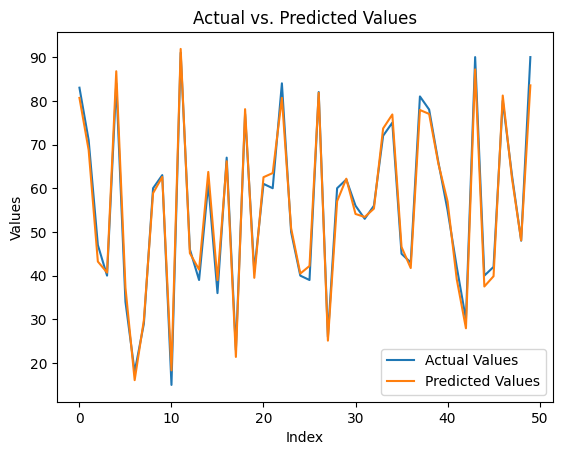

In [300]:
pred = model.predict(X_train)
y = list(y_train)
y = y[:50]
p=y_pred[:50]

import matplotlib.pyplot as plt

# Assuming prediction is the predicted values for y_train
plt.plot(y, label='Actual Values')  # Reset index to match the prediction if necessary
plt.plot(p, label='Predicted Values')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()  # Add legend to differentiate between the lines
plt.show()
